In [1]:
#!ls

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df_brands = pd.read_csv('dim_model_data.csv')
df_led_disb = pd.read_csv('led_disbursements.csv')

In [5]:
binning_required = True

In [6]:
df_led_brand =df_brands[df_brands['CATEGORY_DESC'] == 'LED']

In [7]:
joined = df_led_disb.merge(df_led_brand,left_on='MODEL_ID',right_on='MODEL_ID',how='inner')

In [8]:
del joined['MD5_VALUE']

In [9]:
joined = joined.dropna()

In [10]:
# Mapping city state mapping : custom list (regional)
state_data = pd.read_csv('new_one.csv')

In [11]:
state_data.columns

Index(['city', 'SUM of count', 'State', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [12]:
del state_data['Unnamed: 3']
del state_data['Unnamed: 4']
del state_data['SUM of count']

In [13]:
state_data.head()

,city,State
0,Grand Total,NaN
1,HYDERABAD,AP
2,BANGALORE,KA
3,MUMBAI,MH
4,CHENNAI,TN


In [14]:
#joined.shape

In [15]:
joined.isna().sum()

Unnamed: 0_x                   0
CUSTOMER_ID                    0
AGREEMENT_NO                   0
DISBURSEMENT_DATE              0
PRODUCT_ID                     0
MODEL_ID                       0
AMT_FIN                        0
EMI                            0
AGE                            0
EMPLOYMENTTYPE                 0
GENDER                         0
MARITALSTATUS                  0
CITY                           0
Unnamed: 0_y                   0
MODEL_KEY                      0
MODEL_NO                       0
CATEGORY_ID                    0
CATEGORY_DESC                  0
CATEGORY_STATUS                0
MAKE                           0
MAKE_MODEL_FLAG                0
MANUFACTURER_WARRANTY_YRS      0
MANUFACTURER_ID                0
MANUFACTURER_NAME              0
MODEL_EXPIRY_DATE              0
SELLING_PRICE                  0
SIZE                           0
MODEL_STATUS                   0
EXTENDED_WARRANTY_FLAG         0
UNIT                           0
CATEGORY_D

In [16]:
df_clean = pd.DataFrame()
df_clean[['customer_id','age','etype','gender', 'maritalstatus', 'city','manu_name','dis_data']] = joined[['CUSTOMER_ID','AGE','EMPLOYMENTTYPE','GENDER', 'MARITALSTATUS', 'CITY','MANUFACTURER_NAME','DISBURSEMENT_DATE']]

In [17]:
df_clean.head()

,customer_id,age,etype,gender,maritalstatus,city,manu_name,dis_data
1,65592179,43.0,SELF EMPLOYED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181130
3,20686212,30.0,SELF EMPLOYED,Male,UNMARRIED,JALANDHAR,LG ELECTRONICS INDIA PVT.LTD,20180925
4,21550688,50.0,SELF EMPLOYED,Male,MARRIED,NAGPUR,LG ELECTRONICS INDIA PVT.LTD,20181129
5,18152487,57.0,SALARIED,Female,MARRIED,KOTTAYAM,LG ELECTRONICS INDIA PVT.LTD,20181208
6,52374870,38.0,SELF EMPLOYED,Male,MARRIED,SANGLI,LG ELECTRONICS INDIA PVT.LTD,20181231


In [18]:
df = pd.merge(df_clean, state_data, on='city')

In [19]:
df.head()

,customer_id,age,etype,gender,maritalstatus,city,manu_name,dis_data,State
0,65592179,43.0,SELF EMPLOYED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181130,TN
1,40986359,36.0,SELF EMPLOYED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181211,TN
2,52417053,41.0,SALARIED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20180929,TN
3,40907074,47.0,SELF EMPLOYED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181031,TN
4,50100344,37.0,SALARIED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181116,TN


In [20]:
df.shape

(1333563, 9)

In [21]:
# Dropping all rows where state is not mapped 
df = df[df['State'].notnull()]

In [22]:
df.shape

(995237, 9)

In [23]:
# Binning age and finding floor of agebins and mapping it to df (optimise using pandas Interval datatype)
def binning(df):
    g = []
    for elem in range(100):
        if elem % 5 == 0:
            #print(elem)
            g.append(elem)
    df['AgeRange'] = pd.cut(df['age'], g)
    #from tqdm import tqdm
    temp = ''
    a = []
    for i,row in df.iterrows():
        temp = str(row['AgeRange'])
        temp = temp.replace('(','')
        temp = temp.split(',')
        a.append(temp[0])
    df['age_bin'] = a
    return df
if binning_required == True:
    df = binning(df)


In [24]:
# from tqdm import tqdm
# temp = ''
# a = []
# for i,row in tqdm(df.iterrows(),total=df.shape[0]):
#     temp = str(row['AgeRange'])
#     temp = temp.replace('(','')
#     temp = temp.split(',')
#     a.append(temp[0])
# df['age_bin'] = a

In [25]:
df.head()

,customer_id,age,etype,gender,maritalstatus,city,manu_name,dis_data,State,AgeRange,age_bin
0,65592179,43.0,SELF EMPLOYED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181130,TN,"(40, 45]",40
1,40986359,36.0,SELF EMPLOYED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181211,TN,"(35, 40]",35
2,52417053,41.0,SALARIED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20180929,TN,"(40, 45]",40
3,40907074,47.0,SELF EMPLOYED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181031,TN,"(45, 50]",45
4,50100344,37.0,SALARIED,Male,MARRIED,COIMBATORE,LG ELECTRONICS INDIA PVT.LTD,20181116,TN,"(35, 40]",35


In [26]:
df['etype'] = df['etype'].replace({'SELF EMPLOYED': 'self_employed', 'Self Employed': 'self_employed', 'SELF EMPLOYED PROFESSIONAL': 'self_employed','Self Employed Professional':'self_employed'})

In [27]:
df['etype'] = df['etype'].replace({'SALARIED': 'salaried', 'Salaried': 'salaried', 'SAL': 'salaried'})

In [28]:
df.etype.value_counts()

self_employed      860613
salaried           134401
Not Categorized       206
OTHERS                 17
Name: etype, dtype: int64

In [29]:
df.maritalstatus.value_counts()

MARRIED      876667
UNMARRIED    118376
DIVORCEE        167
WIDOW            27
Name: maritalstatus, dtype: int64

In [30]:
# Optimise or will handle at sql end
yyyymm = ''
yyyy = ''
mm = ''
temp = ''
list_yyyymm = []
list_yyyy = []
list_mm = []
from tqdm import tqdm
for i,row in tqdm(df.iterrows(),total = df.shape[0]):
    temp = row['dis_data']
    yyyymm = str(temp)[:6]
    yyyy = str(temp)[:4]
    mm = str(temp)[4:6]
    list_yyyymm.append(yyyymm)
    list_yyyy.append(yyyy)
    list_mm.append(mm)

100%|██████████| 995237/995237 [01:37<00:00, 10179.23it/s]


In [31]:
df['yyyymm'] = list_yyyymm
df['yyyy'] = list_yyyy
df['mm'] = list_mm

In [32]:
df = df.dropna()

In [33]:
# temp = ''
# a = []
# for i,row in tqdm(df.iterrows(),total=df.shape[0]):
#     temp = str(row['AgeRange'])
#     temp = temp.replace('(','')
#     temp = temp.split(',')
#     a.append(temp[0])
# df['age_bin'] = a

In [34]:
del df['customer_id']
del df['city']
del df['dis_data']
del df['AgeRange']

In [35]:
df.head()

,age,etype,gender,maritalstatus,manu_name,State,age_bin,yyyymm,yyyy,mm
0,43.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,40,201811,2018,11
1,36.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,35,201812,2018,12
2,41.0,salaried,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,40,201809,2018,09
3,47.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,45,201810,2018,10
4,37.0,salaried,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,35,201811,2018,11


In [36]:
df1 = df.manu_name.value_counts().to_frame().reset_index()

In [37]:
df1.columns = ['brand','count']

In [38]:
top_7 = df1.iloc[:7].brand.tolist()

In [39]:
df= df.drop(df[(df['manu_name'] != top_7[0]) & (df['manu_name'] != top_7[1]) & (df['manu_name'] != top_7[2]) & (df['manu_name'] != top_7[3]) & (df['manu_name'] != top_7[4]) & (df['manu_name'] != top_7[5]) & (df['manu_name'] != top_7[6])].index)

In [40]:
df.head()

,age,etype,gender,maritalstatus,manu_name,State,age_bin,yyyymm,yyyy,mm
0,43.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,40,201811,2018,11
1,36.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,35,201812,2018,12
2,41.0,salaried,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,40,201809,2018,09
3,47.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,45,201810,2018,10
4,37.0,salaried,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,35,201811,2018,11


In [41]:
df.shape

(892649, 10)

In [42]:
df.manu_name.value_counts()

SONY INDIA LIMITED                            258420
LG ELECTRONICS INDIA PVT.LTD                  231898
SAMSUNG ELECTRONICS INDIA LIMITED             213826
PANASONIC INDIA LIMITED                       109863
LLOYD ELECTRIC & ENGINEERING LIMITED(LEEL)     30725
HAIER APPLIANCES (INDIA) P.LIMITED             29433
INTEX                                          18484
Name: manu_name, dtype: int64

In [43]:
from sklearn import preprocessing

In [44]:
le = preprocessing.LabelEncoder()

In [45]:
le.fit(df.manu_name.unique())

LabelEncoder()

In [46]:
le.classes_

array(['HAIER APPLIANCES (INDIA) P.LIMITED', 'INTEX',
       'LG ELECTRONICS INDIA PVT.LTD',
       'LLOYD ELECTRIC & ENGINEERING LIMITED(LEEL)',
       'PANASONIC INDIA LIMITED', 'SAMSUNG ELECTRONICS INDIA LIMITED',
       'SONY INDIA LIMITED'], dtype=object)

In [47]:
df['label'] = le.transform(df.manu_name)

In [48]:
df.label.value_counts()

6    258420
2    231898
5    213826
4    109863
3     30725
0     29433
1     18484
Name: label, dtype: int64

In [49]:
df.head()

,age,etype,gender,maritalstatus,manu_name,State,age_bin,yyyymm,yyyy,mm,label
0,43.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,40,201811,2018,11,2
1,36.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,35,201812,2018,12,2
2,41.0,salaried,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,40,201809,2018,09,2
3,47.0,self_employed,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,45,201810,2018,10,2
4,37.0,salaried,Male,MARRIED,LG ELECTRONICS INDIA PVT.LTD,TN,35,201811,2018,11,2


In [50]:
del df['manu_name']

# Preprocessing done, Model wrangling starts

In [51]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [52]:
one_hot = pd.get_dummies(df['etype'])
df = df.drop('etype',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['gender'])
df = df.drop('gender',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['maritalstatus'])
df = df.drop('maritalstatus',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['State'])
df = df.drop('State',axis = 1)
df = df.join(one_hot)

In [53]:
df.head()

,age,age_bin,yyyymm,yyyy,mm,label,Not Categorized,OTHERS,salaried,self_employed,Female,Male,DIVORCEE,MARRIED,UNMARRIED,WIDOW,AP,BH,BR,DELHI,GJ,HR,KA,KE,MH,MP,OR,PU,RJ,TN,UK,UP,WB
0,43.0,40,201811,2018,11,2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,36.0,35,201812,2018,12,2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.0,40,201809,2018,09,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,47.0,45,201810,2018,10,2,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,37.0,35,201811,2018,11,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [54]:
df.shape

(892649, 33)

In [55]:
#df.dtypes
#df.to_csv('all_data_train.csv',index=None)

In [56]:
y = df.label.tolist()
del df['label']
X = df.copy()

In [57]:
X = X.values
y = y

In [78]:
set(y)

{0, 1, 2, 3, 4, 5, 6}

In [58]:
len(X),len(y)

(892649, 892649)

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [60]:
#!python3 -m pip install xgboost --user
len(y_train),len(y_test)

(714119, 178530)

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import cohen_kappa_score

In [80]:
model = RandomForestClassifier(n_jobs = -1,verbose = 0)
model.fit(X_train,y_train)
accuracy_score(y_test, model.predict(X_test)),cohen_kappa_score(y_test, model.predict(X_test))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.2852181706155828, 0.029151108056706843)

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [79]:
X_train_sc, X_test_sc, y_train_sc, y_test_sc = train_test_split(X_sc,y,test_size=0.2,random_state=42)
clf = RandomForestClassifier(verbose=1,n_jobs=4)
clf.fit(X_train_sc,y_train_sc)
y_pred = clf.predict(X_test_sc)
accuracy_score(y_test_sc, y_pred)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    2.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 out of  10 | elapsed:    0.2s finished


0.28547022909314962

In [72]:
model = RandomForestClassifier(n_jobs = -1,verbose = 0,class_weight='balanced')
model.fit(X_train,y_train)
accuracy_score(y_test, model.predict(X_test)),cohen_kappa_score(y_test, model.predict(X_test))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.14953789279112753, 0.028203741695382867)

In [117]:
model = RandomForestClassifier(n_jobs = -1,verbose = 0,class_weight='balanced_subsample')
model.fit(X_train,y_train)
accuracy_score(y_test, model.predict(X_test)),cohen_kappa_score(y_test, model.predict(X_test))

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(0.14892735114546574, 0.028020802156003777)

In [81]:
from sklearn import metrics
fpr, tpr, threholds = metrics.roc_curve(y_test,model.predict(X_test),pos_label=0)

In [85]:
!python3 -m pip install scikit-plot --user

    100% |████████████████████████████████| 286kB 19.9MB/s ta 0:00:01


In [91]:
import scikitplot as sktplt
import matplotlib.pyplot as plt

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


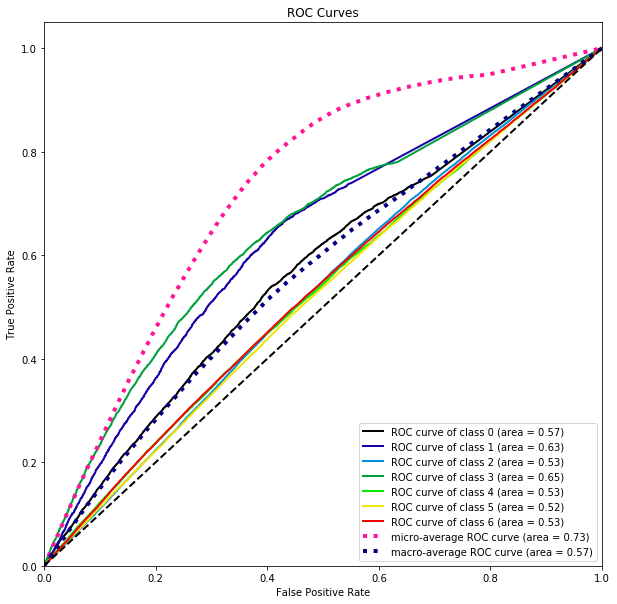

In [104]:
#Normal RandomForest ROC curve 
sktplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test),figsize = (10,10))

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


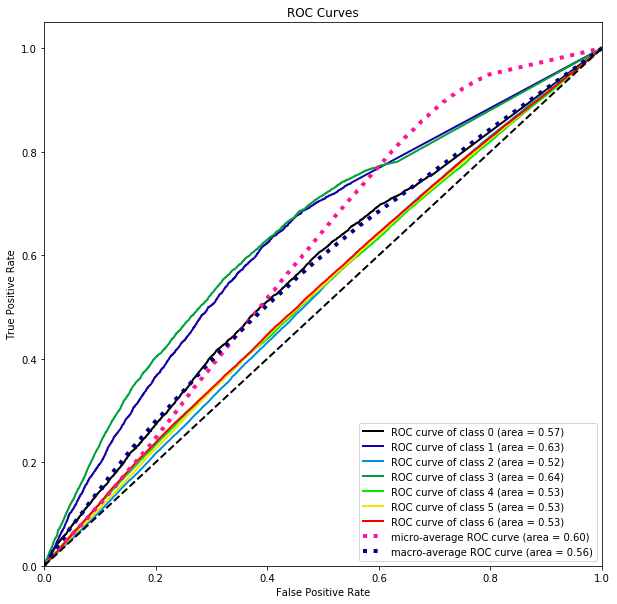

In [118]:
#Balanced-subsample ROC Curve
sktplt.metrics.plot_roc_curve(y_test, model.predict_proba(X_test),figsize = (10,10))

In [106]:
import xgboost as xgb

In [107]:
model = xgb.XGBClassifier(n_jobs=-1)

In [108]:
model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [109]:
y_pred = model.predict(X_test)

In [110]:
y_prob = model.predict_proba(X_test)

In [113]:
y_pred[0]

2

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=DeprecationWarning)


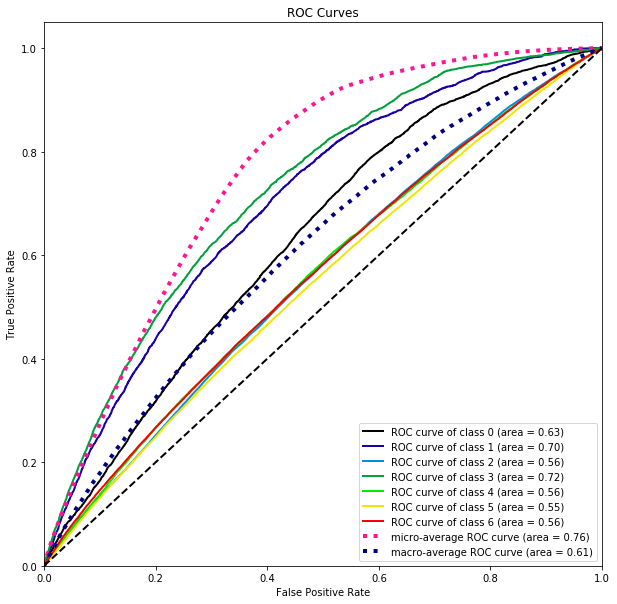

In [116]:
#Xgboost ROC Curve
sktplt.metrics.plot_roc_curve(y_test,model.predict_proba(X_test),figsize=(10,10))

In [198]:
#y_pred = model.predict(X_train)
len(X_train)

714119

In [199]:
#Calculating Cohen kappa score
# from sklearn.metrics import cohen_kappa_score
# ck = cohen_kappa_score(y_test, y_pred)

In [202]:
# ck

In [192]:
accuracy_score(y_test, y_pred)

0.30506357474934187

In [173]:
df['label'] = y

In [183]:
#df.to_csv('R20.7/R20_all_data.csv',index=None)

In [193]:
import pickle
with open('R20.7/R20.7.model','wb') as f:
    pickle.dump(model,f)
with open('R20.7/R20.7.le','wb') as f:
    pickle.dump(le,f)

In [194]:
#open('R20.7/R20.7_feature_columns.txt','w').write(str(df.columns))

300

In [159]:
del OP_df_test_data

In [160]:
# Converting list to dataframes for test_data
OP_df_test_data = pd.DataFrame(columns = ['y_test','y_pred'])
OP_df_test_data['y_test'] = y_test
OP_df_test_data['y_pred'] = y_pred
#OP_df_test_with_input = pd.

In [161]:
OP_df_test_data.head(3)

,y_test,y_pred
0,2,2
1,0,2
2,4,2


In [162]:
OP_df_test_data['true_label'] = le.inverse_transform(OP_df_test_data.y_test)
OP_df_test_data['pred_label'] = le.inverse_transform(OP_df_test_data.y_pred)

In [163]:
len(y_prob)

178530

In [164]:
y_prob[178529]

array([ 0.01435705,  0.00469512,  0.19416149,  0.00935697,  0.13696031,
        0.26476163,  0.37570742], dtype=float32)

In [165]:
ec

[2, 5, 6]

In [166]:
tt = []
top_3_probs = []
prob1 = []
prob2 = []
prob3 = []
for v in range(len(y_prob)):
    ec = []
    top_3_idx = np.argsort(y_prob[v])[-3:]
    ec = list(top_3_idx)
    tt.append(ec)
    prob1.append(y_prob[v][ec[2]])
    prob2.append(y_prob[v][ec[1]])
    prob3.append(y_prob[v][ec[0]])
    

# c = 0
# e = []
# for vv in range(len(tt)):
#     e = tt[vv]
#     for i in range(3):
#         if e[i] == y_test[vv]:
#             c += 1
#             break

OP_df_test_data['Reco_3_label'],OP_df_test_data['Reco_2_label'],OP_df_test_data['Reco_1_label'] = np.array(tt).T

OP_df_test_data['Reco_1'] = le.inverse_transform(OP_df_test_data['Reco_1_label'].values)
OP_df_test_data['Reco_2'] = le.inverse_transform(OP_df_test_data['Reco_2_label'].values)
OP_df_test_data['Reco_3'] = le.inverse_transform(OP_df_test_data['Reco_3_label'].values)

OP_df_test_data['Prob_1'] = prob1
OP_df_test_data['Prob_2'] = prob2
OP_df_test_data['Prob_3'] = prob3
# del df_preds['Reco_1_label']
# del df_preds['Reco_2_label']
# del df_preds['Reco_3_label']

#df_preds.to_csv('Reco_final_list.csv',index=None)

In [167]:
len(prob1),OP_df_test_data.shape,type(prob1)

(178530, (178530, 13), list)

In [168]:
y_prob[0]

array([ 0.04154757,  0.02505129,  0.27324489,  0.06758145,  0.1065345 ,
        0.23657091,  0.2494694 ], dtype=float32)

In [170]:
OP_df_test_data.to_csv('R20_test_data_with_labels_probs.csv',index=None)

In [131]:
OP_df_test_data.shape

(178530, 4)

In [ ]:
#accuracy_score(y_, y_pred)

In [ ]:
# feat_importances = pd.Series(clf.feature_importances_)
# %matplotlib inline

In [ ]:
# feat_importances.nlargest(len(feat_importances)).plot(kind='barh')

In [197]:
tt = []
for v in range(len(y_prob)):
    ec = []
    top_3_idx = np.argsort(y_prob[v])[-3:]
    ec = list(top_3_idx)
    tt.append(ec)

c = 0
e = []
for vv in range(len(tt)):
    e = tt[vv]
    for i in range(3):
        if e[i] == y_test[vv]:
            c += 1
            break
c/len(tt)

0.7885677477174704

0.7885677477174704

In [18]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score
import pickle

import xgboost as xgb

sql = False

def sql_bypass(df):
    #df =df[df['CATEGORY_DESC'] == 'LED']
    df['city'] = df['CITY']
    state_data = pd.read_csv('state_list.csv')
    print(state_data.head())
    df = pd.merge(df, state_data, on='city')
    #df_clean = pd.DataFrame()
    df['yyyymm'] = '201805'
    df['yyyy'] = '2018'
    df['mm'] = '05'
    # Binnig age
    g = []
    for elem in range(100):
        if elem % 5 == 0:
            #print(elem)
            g.append(elem)
    df['AgeRange'] = pd.cut(df['AGE'], g)

    # Getting ceil of age_range
    temp = ''
    a = []
    for i,row in df.iterrows():
        temp = str(row['AgeRange'])
        temp = temp.replace('(','')
        temp = temp.split(',')
        a.append(temp[0])
    df['age_bin'] = a
    df[['customer_id','age','age_bin','yyyymm','yyyy','mm','etype','gender', 'maritalstatus', 'state']] = df[['CUSTOMER_ID','AGE','age_bin','yyyymm','yyyy','mm','EMPLOYMENTTYPE','GENDER', 'MARITALSTATUS', 'State']]
    df = df.dropna()


    df['EMPLOYMENTTYPE'] = df['EMPLOYMENTTYPE'].replace({'SELF EMPLOYED': 'self_employed', 'Self Employed': 'self_employed', 'SELF EMPLOYED PROFESSIONAL': 'self_employed','Self Employed Professional':'self_employed'})
    df['EMPLOYMENTTYPE'] = df['EMPLOYMENTTYPE'].replace({'SALARIED': 'salaried', 'Salaried': 'salaried', 'SAL': 'salaried'})

    df = df.dropna()
    del df['AgeRange']
    return df

#	age	age_bin	yyyymm	yyyy	mm	label	Not Categorized	OTHERS	salaried	self_employed	Female	Male	DIVORCEE	MARRIED	UNMARRIED	WIDOW	AP	BH	BR	DELHI	GJ	HR	KA	KE	MH	MP	OR	PU	RJ	TN	UK	UP	WB

In [19]:
if sql == False:
    print(pd.read_csv('led_disbursements.csv').head())
    df = pd.read_csv('led_disbursements.csv')
    df = sql_bypass(df)
    print(df.head(),df.columns)
    df_pred = pd.DataFrame()
    df_pred[['customer_id','age','age_bin','yyyymm','yyyy','mm','etype','gender', 'maritalstatus', 'state']] = df[['CUSTOMER_ID','AGE','age_bin','yyyymm','yyyy','mm','EMPLOYMENTTYPE','GENDER', 'MARITALSTATUS', 'State']]
    print(df_pred.head(20))
else:
    df_pred = pd.read('led_sql_process.csv')


del df
df = pd.DataFrame()
df = df_pred.dropna()

df_preds = pd.DataFrame()
df_preds['customer_id'] = df['customer_id']
del df['customer_id']

# One_hotting Data

one_hot = pd.get_dummies(df['etype'])
df = df.drop('etype',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['gender'])
df = df.drop('gender',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['maritalstatus'])
df = df.drop('maritalstatus',axis = 1)
df = df.join(one_hot)

one_hot = pd.get_dummies(df['state'])
df = df.drop('state',axis = 1)
df = df.join(one_hot)

if df.shape[1] == 33:
    print('Feature Generation complete, Moving forward for predictions')
else:
    print('Please check the columns for feature matrix')


with open('R20.7.model','rb') as f:
    model = pickle.load(f)
with open('R20.7.le','rb') as f:
    le = pickle.load(f)

   Unnamed: 0  CUSTOMER_ID    AGREEMENT_NO  DISBURSEMENT_DATE PRODUCT_ID  \
0           0     69992537  4W2RCD94212620           20181113        RCD   
1           1     66045861  4380CD70492193           20180410         CD   
2           2     59748755  4290CD89566138           20180930         CD   
3           3    105045977  4D30CD93426426           20181108         CD   
4           4     67682737  4400CD73400787           20180430         CD   

   MODEL_ID  AMT_FIN     EMI   AGE EMPLOYMENTTYPE  GENDER MARITALSTATUS  \
0     97839  20500.0  1709.0   NaN            NaN     NaN           NaN   
1     89206  25500.0  2125.0  30.0  SELF EMPLOYED    Male       MARRIED   
2     97855  45000.0  2500.0  33.0  SELF EMPLOYED  Female       MARRIED   
3     95606  21300.0  1775.0   NaN            NaN     NaN           NaN   
4     82245  12750.0  1063.0  60.0  SELF EMPLOYED    Male       MARRIED   

        CITY  
0        NaN  
1  JALANDHAR  
2      ERODE  
3        NaN  
4     AMBALA  
  

In [20]:
df.head()

,age,age_bin,yyyymm,yyyy,mm,Not Categorized,OTHERS,salaried,self_employed,Female,...,KE,MH,MP,OR,PU,RJ,TN,UK,UP,WB
0,30.0,25,201805,2018,05,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,38.0,35,201805,2018,05,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
2,33.0,30,201805,2018,05,0,0,0,1,1,...,0,0,0,0,1,0,0,0,0,0
3,41.0,40,201805,2018,05,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
4,40.0,35,201805,2018,05,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [40]:
df.columns

Index(['age', 'age_bin', 'yyyymm', 'yyyy', 'mm', 'Not Categorized', 'OTHERS',
       'salaried', 'self_employed', 'Female', 'Male', 'DIVORCEE', 'MARRIED',
       'UNMARRIED', 'WIDOW', 'AP', 'BH', 'BR', 'DELHI', 'GJ', 'HR', 'KA', 'KE',
       'MH', 'MP', 'OR', 'PU', 'RJ', 'TN', 'UK', 'UP', 'WB'],
      dtype='object')

In [41]:
cols

['age',
 'age_bin',
 'yyyymm',
 'yyyy',
 'mm',
 'Not Categorized',
 'OTHERS',
 'salaried',
 'self_employed',
 'Female',
 'Male',
 'DIVORCEE',
 'MARRIED',
 'UNMARRIED',
 'WIDOW',
 'AP',
 'BH',
 'BR',
 'DELHI',
 'GJ',
 'HR',
 'KA',
 'KE',
 'MH',
 'MP',
 'OR',
 'PU',
 'RJ',
 'TN',
 'UK',
 'UP',
 'WB']

In [39]:
cols = ['age','age_bin','yyyymm','yyyy','mm','Not Categorized','OTHERS','salaried','self_employed','Female','Male','DIVORCEE','MARRIED','UNMARRIED','WIDOW','AP','BH','BR','DELHI','GJ','HR','KA','KE','MH','MP','OR','PU','RJ','TN','UK','UP','WB']

In [43]:
df = df.reindex(cols,axis=1)

In [ ]:
#['age', 'Not Categorized', 'OTHERS', 'salaried', 'self_employed',
        'Female', 'Male', 'DIVORCEE', 'MARRIED', 'UNMARRIED', 'WIDOW', 'AP',
        'BH', 'BR', 'DELHI', 'GJ', 'HR', 'KA', 'KE', 'MH', 'MP', 'OR', 'PU',
        'RJ', 'TN', 'UK', 'UP', 'WB', 'yyyymm', 'yyyy', 'mm']

In [ ]:
#	age	age_bin	yyyymm	yyyy	mm	label	Not Categorized	OTHERS	salaried	self_employed	Female	Male	DIVORCEE	MARRIED	UNMARRIED	WIDOW	AP	BH	BR	DELHI	GJ	HR	KA	KE	MH	MP	OR	PU	RJ	TN	UK	UP	WB

In [ ]:
# df['age_bin']  = 

In [6]:
# df['yyyymm'] = '201805'
# df['yyyy'] = '2018'
# df['mm'] = '05'

In [21]:
df.columns,df.shape

(Index(['age', 'age_bin', 'yyyymm', 'yyyy', 'mm', 'Not Categorized', 'OTHERS',
        'salaried', 'self_employed', 'Female', 'Male', 'DIVORCEE', 'MARRIED',
        'UNMARRIED', 'WIDOW', 'AP', 'BH', 'BR', 'DELHI', 'GJ', 'HR', 'KA', 'KE',
        'MH', 'MP', 'OR', 'PU', 'RJ', 'TN', 'UK', 'UP', 'WB'],
       dtype='object'), (996042, 32))

In [44]:
y_pred = model.predict(df.values)
y_prob  = model.predict_proba(df.values)

In [45]:
tt = []
for v in range(len(y_prob)):
    ec = []
    top_3_idx = np.argsort(y_prob[v])[-3:]
    ec = list(top_3_idx)
    tt.append(ec)

# c = 0
# e = []
# for vv in range(len(tt)):
#     e = tt[vv]
#     for i in range(3):
#         if e[i] == y_test[vv]:
#             c += 1
#             break

df_preds['Reco_1_label'],df_preds['Reco_2_label'],df_preds['Reco_3_label'] = np.array(tt).T

df_preds['Reco_1'] = le.inverse_transform(df_preds['Reco_1_label'].values)
df_preds['Reco_2'] = le.inverse_transform(df_preds['Reco_2_label'].values)
df_preds['Reco_3'] = le.inverse_transform(df_preds['Reco_3_label'].values)

del df_preds['Reco_1_label']
del df_preds['Reco_2_label']
del df_preds['Reco_3_label']

df_preds.to_csv('Reco_final_list.csv',index=None)
#test_thing["Probs_HAIER APPLIANCES (INDIA) P.LIMITED"], test_thing["Probs_INTEX"], test_thing["Probs_LG ELECTRONICS INDIA PVT.LTD"] = y_prob.T

In [46]:
df_preds.head()

,customer_id,Reco_1,Reco_2,Reco_3
0,66045861,SONY INDIA LIMITED,LG ELECTRONICS INDIA PVT.LTD,SAMSUNG ELECTRONICS INDIA LIMITED
1,63132391,SONY INDIA LIMITED,LG ELECTRONICS INDIA PVT.LTD,SAMSUNG ELECTRONICS INDIA LIMITED
2,38452266,SONY INDIA LIMITED,LG ELECTRONICS INDIA PVT.LTD,SAMSUNG ELECTRONICS INDIA LIMITED
3,43166523,LG ELECTRONICS INDIA PVT.LTD,SONY INDIA LIMITED,SAMSUNG ELECTRONICS INDIA LIMITED
4,15968976,LG ELECTRONICS INDIA PVT.LTD,SAMSUNG ELECTRONICS INDIA LIMITED,SONY INDIA LIMITED
